<a href="https://colab.research.google.com/github/fb004/Business-Intelligence-and-Analytics/blob/master/labs/06%20-%20Clustering/Exercises/exercise_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/06%20-%20Clustering/Exercises/exercise_clustering.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise: Clustering

In this exercise we will look at student grades. We will cluster these grades into a number of groups that fit the data.

First let's read in the data into a Pandas data frame:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
# %matplotlib inline

url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/grades.csv"

grades = pd.read_csv(url)

grades.head()


,Grades
0,73.07
1,76.39
2,1.56
3,18.49
4,60.04


### Question 1. How many observations are in the grades dataframe?

In [2]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Grades  150 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB


### Question 2. Plot a histogram of the Grades series

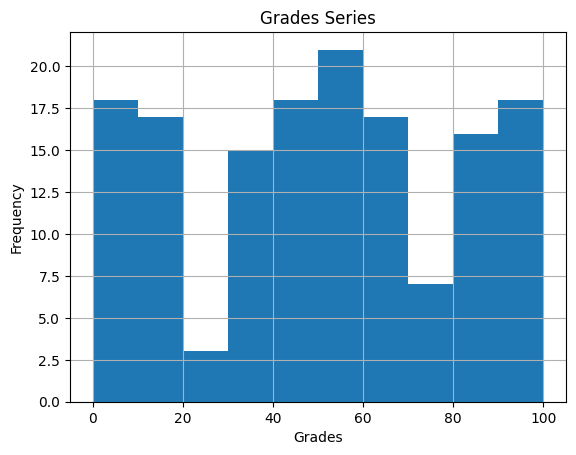

In [5]:
hist_grades=grades.hist()
plt.title('Grades Series')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

### Question 3. Plot the grades as a one-dimension scatterplot:

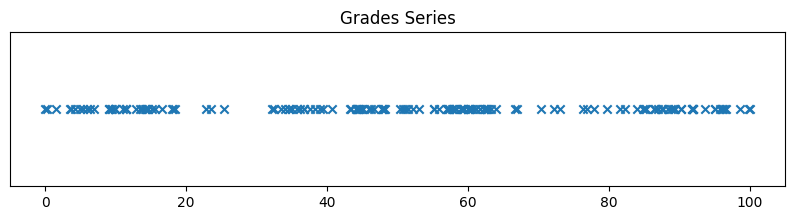

In [10]:
plt.figure(figsize=(10,2))
plt.scatter(grades, np.zeros_like(grades), marker='x')
plt.yticks([])
plt.title('Grades Series')
plt.show()

Using this graphical representation, how many groups / clusters do you think there are?

### Question 4. Fit a KMeans algorithm for k=2, random_state=0, as shown in the walkthrough

In [17]:
algorithm = KMeans(n_clusters=2, random_state=0)
algorithm.fit(X_2D)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

### Question 5. Print the resulting model labels, the cluster centers, and make a one-dimension scatterplot with the grades colored by the cluster they belong to.

In [18]:
print(algorithm.labels_)

[0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1
 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0
 0 0]


In [19]:
print(algorithm.cluster_centers_)


[[73.99303797]
 [25.07225352]]


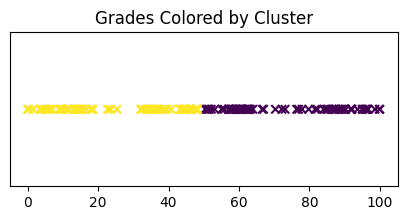

In [21]:
plt.figure(figsize=(5, 2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=algorithm.labels_, cmap='viridis')
plt.yticks([])
plt.title('Grades Colored by Cluster')
plt.show()

Add the cluster centers to your scatterplot above

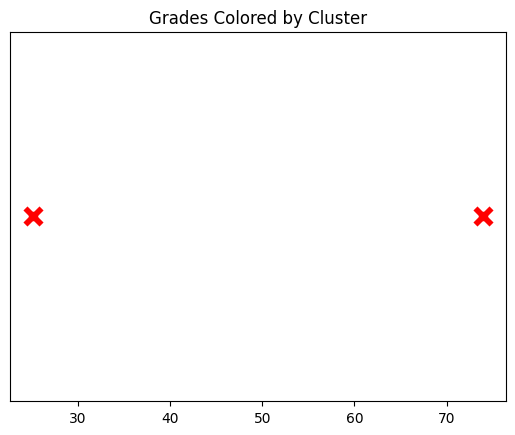

In [37]:
plt.scatter(centroids1, np.zeros_like(centroids1),
            s=300, c='red', marker='X', edgecolors='white',
            linewidth=2, label='Centroids')
plt.yticks([])

plt.title('Grades Colored by Cluster')
plt.show()

Below you can see the same code iterated for several values of k.   
Using this graphical representation, which seems to be the optimal value of k?

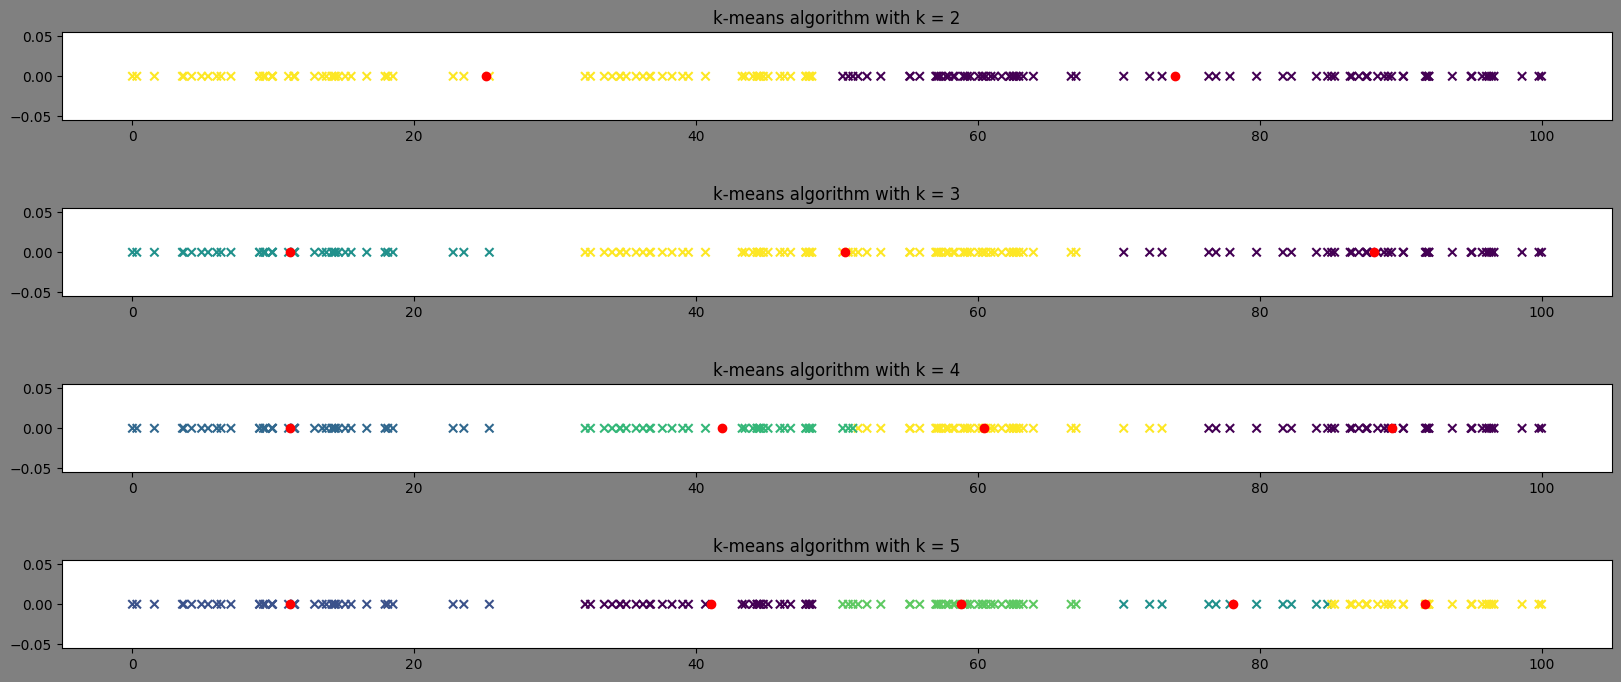

In [35]:
# Fit k-means algorithm for different k
fig, ax = plt.subplots(4, 1, figsize=(20, 8), facecolor="grey")
for k in [2, 3, 4, 5]:
  # Create instance of class
  model = KMeans(n_clusters=k)
  # Fit model
  model.fit(grades)
  # Get centers of clusters
  centers = model.cluster_centers_
  # Get labels
  labels = model.labels_
  # Plot the points, colored by associated cluster
  ax[k-2].scatter(grades, np.zeros_like(grades), marker='x', c=labels, cmap='viridis')
  # Plot the center of each cluster
  ax[k-2].scatter(centers, np.zeros_like(centers), color='red')
  ax[k-2].set_title('k-means algorithm with k = ' + str(k))
plt.subplots_adjust(hspace=1)

### Question 6. Use the elbow method to find the optimal value of k.
Following what you have seen in the walkthrough, run KMeans algorithm on this dataset for values of k from 2 to 20, i.e., `range(2, 20)`. Calculate the inertia for each case and in the end plot the inertia values against the number of clusters (k) values.

__Important: You should use KMeans with `random_state=0` and `n_init=5`, i.e.,  `KMeans(n_clusters=k, random_state=0, n_init=5)`.__

According to the resulting plot, which value of k is optimal?

<h2> Important: This question answers the question 1 in the Moodle quiz. <h2>

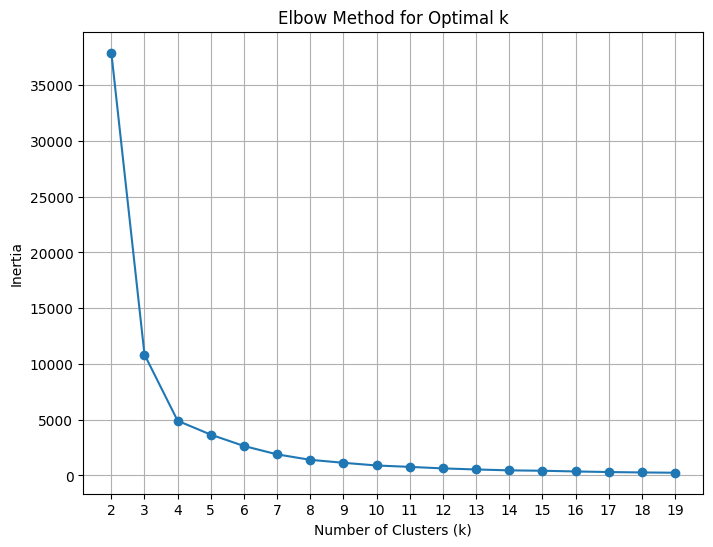

In [38]:
inertia = []
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=5)
    kmeans.fit(grades.values.reshape(-1, 1))
    inertia.append(kmeans.inertia_)

# Plot the inertia values against k
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Show all k values on x-axis
plt.grid(True)
plt.show()

The inertia is defined as the sum of squared distances of each sample to their closest cluster center. This is the cost function that the KMeans algorithm minimizes.

### Question 7. Use an AgglomerativeClustering model, with 5 clusters, euclidean distance and average linkage to partition the grades.

In [41]:
# YOUR CODE HERE
from sklearn.cluster import AgglomerativeClustering
# Create the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')

# Fit the model to the grades data (reshaped to a column vector)
agg_clustering.fit(grades.values.reshape(-1, 1))

# Get the cluster labels for each data point
cluster_labels = agg_clustering.labels_

print("Cluster Labels:", cluster_labels)

Cluster Labels: [3 3 0 0 4 1 1 1 1 1 2 3 2 2 2 1 4 2 0 4 0 1 2 2 1 0 1 2 2 1 1 3 0 4 2 4 1
 1 3 1 1 4 3 2 0 1 0 4 0 0 0 4 1 0 0 2 0 2 0 3 4 0 4 4 2 0 2 2 1 2 0 3 4 0
 4 2 0 2 4 1 4 4 2 1 0 0 2 1 4 0 4 2 3 2 4 4 0 0 0 3 1 1 1 2 0 2 1 0 0 0 1
 2 2 1 2 4 0 1 0 1 4 1 0 0 1 2 4 4 0 0 1 1 1 1 1 1 1 2 0 0 2 2 4 3 1 4 4 4
 4 4]


### Question 8. Use the one-dimensional scatter plot to show how the clusters were formed with the hierachical clustering model trained above (color grades by predicted model label).

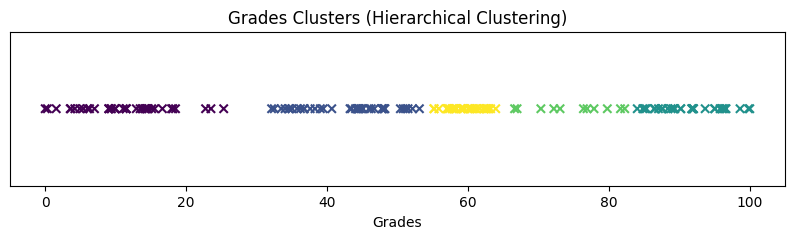

In [42]:
plt.figure(figsize=(10, 2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=cluster_labels, cmap='viridis')
plt.yticks([])  # Remove y-axis ticks for a 1D plot
plt.title('Grades Clusters (Hierarchical Clustering)')
plt.xlabel("Grades")
plt.show()

### Question 9. Plot the dendrogram for the hierarchical clustering model trained above.

At a distance of 30, how many clusters are formed?

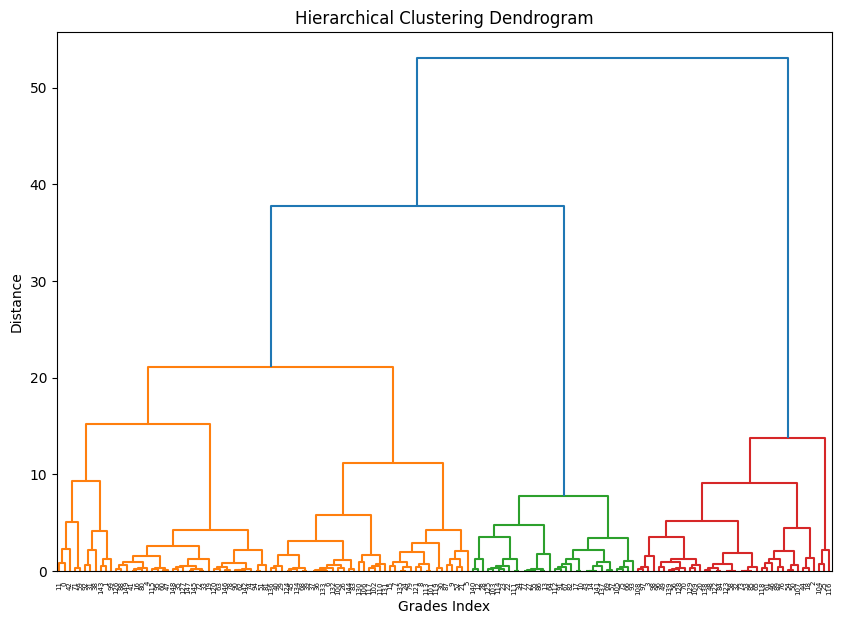

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'grades' is your DataFrame and you've fitted the AgglomerativeClustering model

# Perform linkage to get the linkage matrix
linked = linkage(grades.values.reshape(-1, 1), 'average')  # Using 'average' linkage

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Grades Index")
plt.ylabel("Distance")
plt.show()